In [12]:
import pandas as pd
import numpy as np
# Load the uploaded cleaned dataset
file_path = "C:/Users/bhava/OneDrive/Documents/cleaned_standardized_heart_data.csv"
heart_data = pd.read_csv(file_path)

# Display the structure of the dataset to confirm loading
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   state                      445132 non-null  object 
 1   generalhealth              445132 non-null  int64  
 2   physicalhealthdays         434205 non-null  float64
 3   mentalhealthdays           436065 non-null  float64
 4   lastcheckuptime            436824 non-null  object 
 5   physicalactivities         444039 non-null  object 
 6   sleephours                 439679 non-null  float64
 7   removedteeth               433772 non-null  object 
 8   hadheartattack             445132 non-null  int64  
 9   hadangina                  440727 non-null  object 
 10  hadstroke                  443575 non-null  object 
 11  hadasthma                  443359 non-null  object 
 12  hadskincancer              441989 non-null  object 
 13  hadcopd                    44

C:\Users\bhava\AppData\Local\Temp\ipykernel_24304\1363557187.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart_data, x='hadheartattack', palette='Set2')


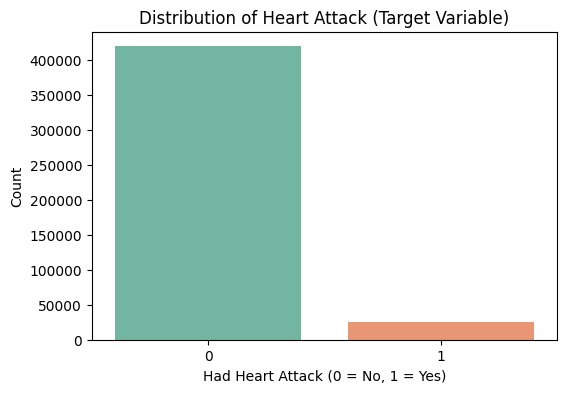

(hadheartattack        1.000000
 physicalhealthdays    0.126994
 weightinkilograms     0.035854
 bmi                   0.030598
 heightinmeters        0.021024
 mentalhealthdays      0.010235
 sleephours           -0.010666
 generalhealth        -0.020406
 Name: hadheartattack, dtype: float64,
 hadheartattack        1.000000
 physicalhealthdays    0.126994
 weightinkilograms     0.035854
 bmi                   0.030598
 heightinmeters        0.021024
 mentalhealthdays      0.010235
 sleephours           -0.010666
 generalhealth        -0.020406
 Name: hadheartattack, dtype: float64)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values by imputing or dropping where necessary
# Impute numerical columns with their mean and categorical columns with mode for simplicity
numerical_cols = heart_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = heart_data.select_dtypes(include=['object', 'bool']).columns

heart_data[numerical_cols] = heart_data[numerical_cols].fillna(heart_data[numerical_cols].mean())
heart_data[categorical_cols] = heart_data[categorical_cols].fillna(heart_data[categorical_cols].mode().iloc[0])

# Check the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=heart_data, x='hadheartattack', palette='Set2')
plt.title('Distribution of Heart Attack (Target Variable)')
plt.xlabel('Had Heart Attack (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Ensure only numeric columns are used for correlation calculations
numerical_cols_only = heart_data.select_dtypes(include=['float64', 'int64']).columns

# Recalculate correlations with the target variable
correlation_with_target_sample = heart_data[numerical_cols_only].corr()['hadheartattack'].sort_values(ascending=False)

# Top 10 correlated features with the target
top_correlated_features = correlation_with_target_sample.head(10)
bottom_correlated_features = correlation_with_target_sample.tail(10)

# Display results
top_correlated_features, bottom_correlated_features

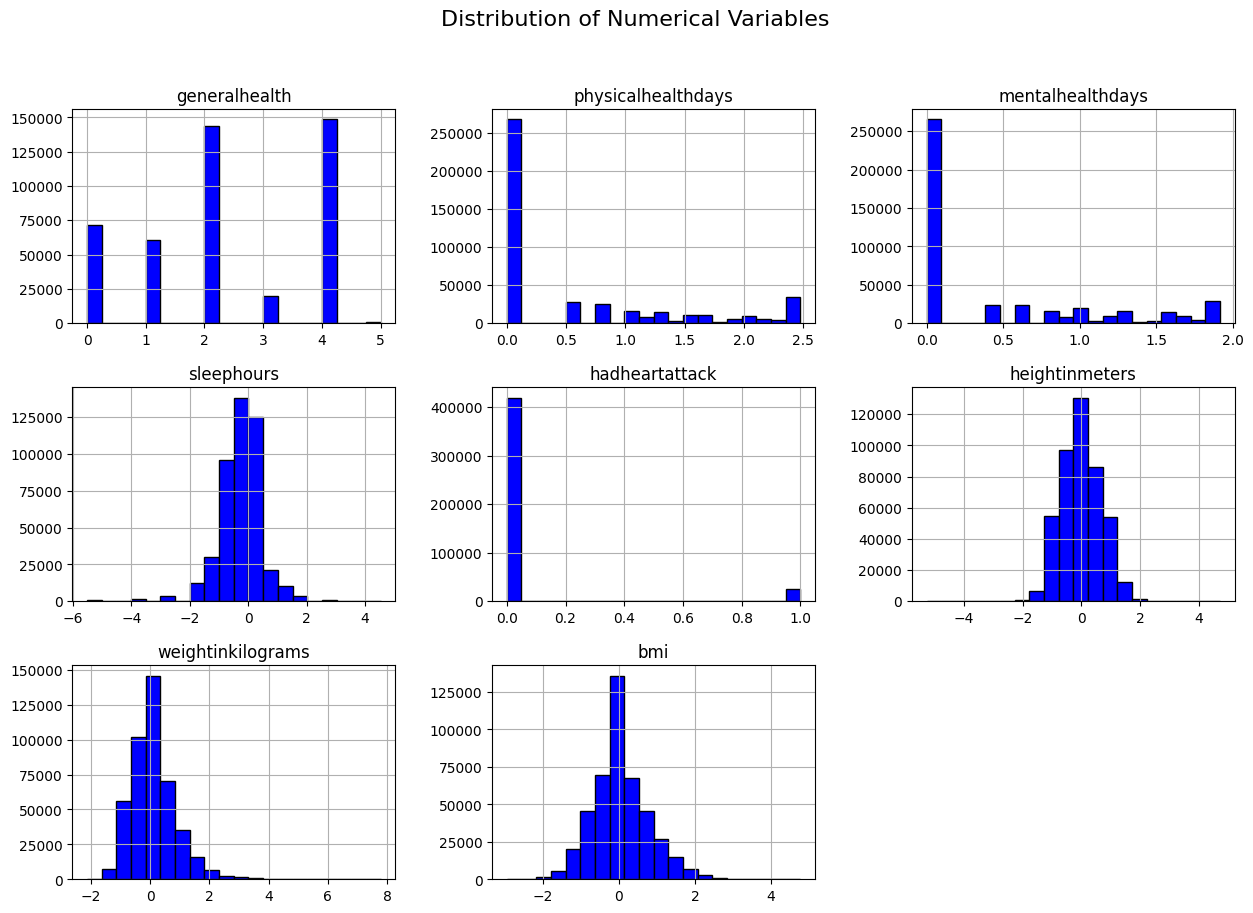

In [14]:
# Numeric Values Histogram
heart_data.hist(figsize=(15, 10), bins=20, color='blue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

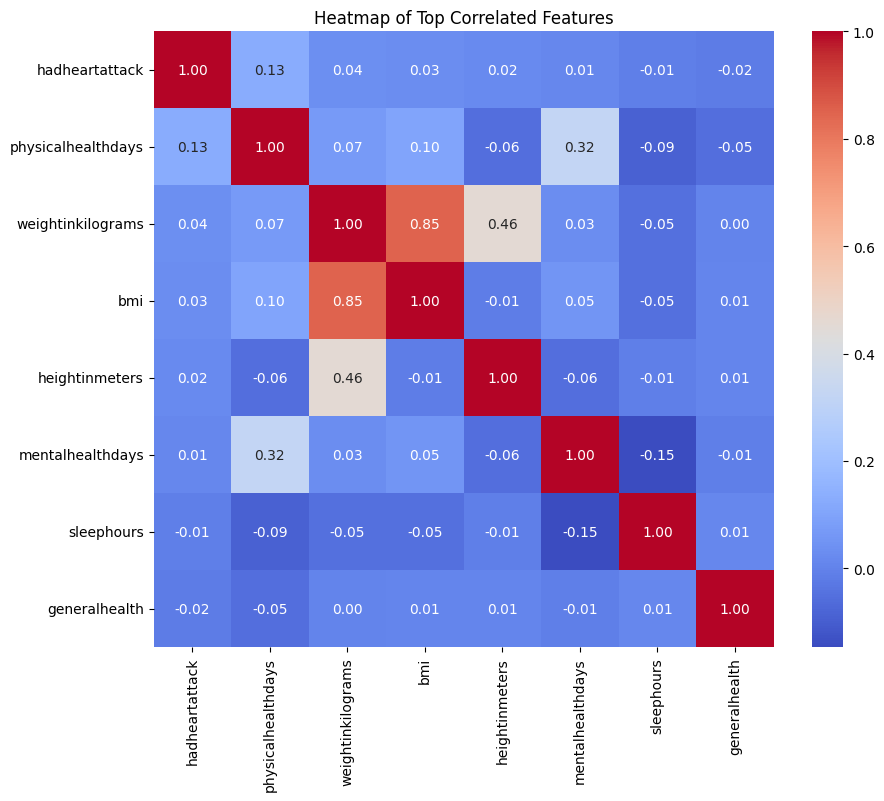

(hadheartattack        1.000000
 physicalhealthdays    0.126994
 weightinkilograms     0.035854
 bmi                   0.030598
 heightinmeters        0.021024
 mentalhealthdays      0.010235
 sleephours           -0.010666
 generalhealth        -0.020406
 Name: hadheartattack, dtype: float64,
 hadheartattack        1.000000
 physicalhealthdays    0.126994
 weightinkilograms     0.035854
 bmi                   0.030598
 heightinmeters        0.021024
 mentalhealthdays      0.010235
 sleephours           -0.010666
 generalhealth        -0.020406
 Name: hadheartattack, dtype: float64)

In [15]:
# Plot a heatmap for the top correlated features with the target
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data[top_correlated_features.index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Top Correlated Features')
plt.show()

# Display the top and bottom correlated features with the target variable
top_correlated_features, bottom_correlated_features